# 1. Data Selection:

1.1 In this project, we are trying to **classify is the client likely to default on a loan** given different parameters.


1.2 We used the 'credit default only numeric data' from Kaggle which includes **10 features and 150k instances**. This dataset provides numeric data for credit default classification.




# 2. Problem Setting and Overall Project Design:

2.1. machine learning models can extract the pattern from the given numerical features in different dimensions to predict the potential of default.


2.2. An existing approach using Random Forest could be found. https://www.kaggle.com/code/devraai/credit-default-prediction-secrets

2.3. this problem should be defined as supervised learning as the correct label is given for each instance. This is a classification problem as we are going to predict the clients default for 90 days on their loans or not.

2.4. We mainly use accuracy and CV_score for grading the models. Recall and Precision may also help.

# 3. Data Exploration and Analysis (EDA) (set a random seed, use a copy of the data):

3.1 Data Description:

* Default:	Client with more than 90 days without paying their loan	[categorical (nominal)]
* Prct_uso_tc:	Percentage of credit card usage in the last month	[numerical (continuous)]
* Edad:	Age	[numerical (discrete)]
* Nro_prestamo_retrasados:	Number of loans with payment delays of more than 3 months in the last 3 years	[numerical (discrete)]
* is Prct_deuda_vs_ingresos:	Financial debt-to-income ratio [numerical (continuous)]
* Mto_ingreso_mensual:	Monthly income amount	[numerical (continuous)]
* Nro_prod_financieros_deuda:	Number of loans (including vehicle or mortgage loans) and number of credit cards last year	[numerical (discrete)]
* Nro_retraso_60dias:	Number of times the client has been over 60 days late in the last 3 years	[numerical (discrete)]
* Nro_creditos_hipotecarios:	Number of mortgage loans	[numerical (discrete)]
* Nro_retraso_ultm3anios:	Number of payment delays over 30 days in the last 3 years	[numerical (discrete)]
* Nro_dependiente:	Number of dependents	[numerical (discrete)]


In [ ]:
#import basic Libraries and load data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
file_path = '/content/sample_data/credit_scoring.csv'
df = pd.read_csv(file_path)
df.head()

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          150000 non-null  int64  
 1   Default                     150000 non-null  int64  
 2   Prct_uso_tc                 150000 non-null  float64
 3   Edad                        150000 non-null  int64  
 4   Nro_prestao_retrasados      150000 non-null  int64  
 5   Prct_deuda_vs_ingresos      150000 non-null  float64
 6   Mto_ingreso_mensual         120269 non-null  float64
 7   Nro_prod_financieros_deuda  150000 non-null  int64  
 8   Nro_retraso_60dias          150000 non-null  int64  
 9   Nro_creditos_hipotecarios   150000 non-null  int64  
 10  Nro_retraso_ultm3anios      150000 non-null  int64  
 11  Nro_dependiente             146076 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [ ]:
# Drop the 'ID' column from the DataFrame
df = df.drop('ID', axis=1)
df.head()

,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
# Renaming columns based on the description provided
df = df.rename(columns={
    'Default': 'Default_90_days',
    'Prct_uso_tc': 'Credit_Card_Utilization',
    'Edad': 'Age',
    'Nro_prestao_retrasados': 'Delayed_Loans_3y',
    'Prct_deuda_vs_ingresos': 'Debt_to_Income_Ratio',
    'Mto_ingreso_mensual': 'Monthly_Income',
    'Nro_prod_financieros_deuda': 'Number_of_loans_and_CreditCard',
    'Nro_retraso_60dias': 'Delays_over_60_days_3y',
    'Nro_creditos_hipotecarios': 'Mortgage_Loans',
    'Nro_retraso_ultm3anios': 'Delays_over_30_days_3y',
    'Nro_dependiente': 'Number_of_Dependents'
})
# Copy of a renamed dataset for training and testing
credit_default = df.copy()
# Display the updated DataFrame to confirm changes
df.head()

,Default_90_days,Credit_Card_Utilization,Age,Delayed_Loans_3y,Debt_to_Income_Ratio,Monthly_Income,Number_of_loans_and_CreditCard,Delays_over_60_days_3y,Mortgage_Loans,Delays_over_30_days_3y,Number_of_Dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0



3.2. Investigate each attribute of the dataset:
- Check for missing data and outliers


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Default_90_days,0
Credit_Card_Utilization,0
Age,0
Delayed_Loans_3y,0
Debt_to_Income_Ratio,0
Monthly_Income,29731
Number_of_loans_and_CreditCard,0
Delays_over_60_days_3y,0
Mortgage_Loans,0
Delays_over_30_days_3y,0


In [ ]:
# Fill missing values with median
df['Monthly_Income'].fillna(df['Monthly_Income'].median(), inplace=True)
df['Number_of_Dependents'].fillna(df['Number_of_Dependents'].median(), inplace=True)

<ipython-input-10-079a6873ceef>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Monthly_Income'].fillna(df['Monthly_Income'].median(), inplace=True)
<ipython-input-10-079a6873ceef>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

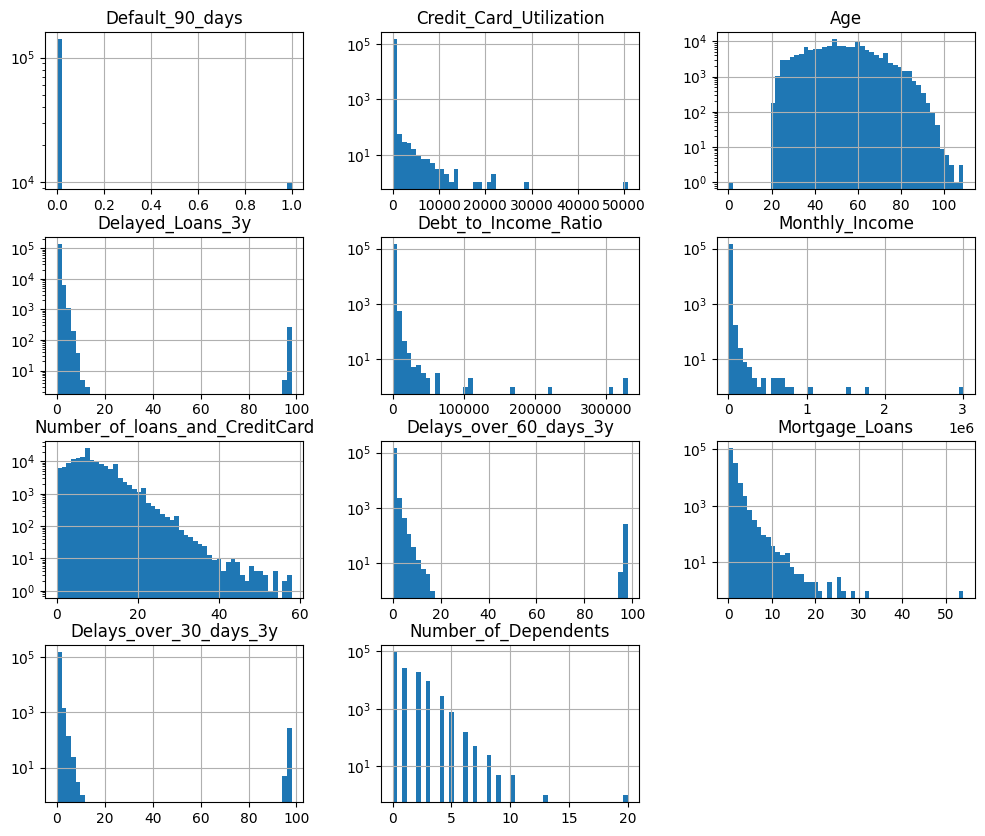

In [ ]:
#print dataframe histogram
df.hist(bins=50, figsize=(12, 10), log=True)
plt.show()

In [ ]:
#locate Credit_Card_Utilization outliers:
df[df['Credit_Card_Utilization'] > 100]

,Default_90_days,Credit_Card_Utilization,Age,Delayed_Loans_3y,Debt_to_Income_Ratio,Monthly_Income,Number_of_loans_and_CreditCard,Delays_over_60_days_3y,Mortgage_Loans,Delays_over_30_days_3y,Number_of_Dependents
293,0,2340.0,45,0,0.339333,8333.0,7,0,2,0,2.0
697,1,2066.0,58,0,0.271121,6000.0,8,1,1,0,1.0
1991,1,1143.0,44,2,0.547762,6500.0,13,0,4,0,2.0
2331,0,6324.0,59,0,0.136673,11318.0,4,0,1,0,1.0
4278,0,1982.0,33,0,0.144982,8000.0,4,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
145587,0,7452.0,52,0,0.351365,10000.0,5,0,2,0,3.0
149102,0,6109.0,43,0,0.229902,12500.0,9,0,2,0,0.0
149160,0,22000.0,38,0,1.080020,3973.0,7,0,2,0,3.0
149245,0,771.0,52,0,0.832021,8000.0,13,0,3,0,0.0


In [ ]:
#locate Age outliers:
df[df['Age'] <10]

,Default_90_days,Credit_Card_Utilization,Age,Delayed_Loans_3y,Debt_to_Income_Ratio,Monthly_Income,Number_of_loans_and_CreditCard,Delays_over_60_days_3y,Mortgage_Loans,Delays_over_30_days_3y,Number_of_Dependents
65695,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [ ]:
#locate Monthly_Income outliers:
df[df['Monthly_Income'] > 1e6]

,Default_90_days,Credit_Card_Utilization,Age,Delayed_Loans_3y,Debt_to_Income_Ratio,Monthly_Income,Number_of_loans_and_CreditCard,Delays_over_60_days_3y,Mortgage_Loans,Delays_over_30_days_3y,Number_of_Dependents
50640,0,0.469025,44,1,0.004537,1072500.0,9,0,2,0,1.0
73763,0,0.007328,52,0,0.001470,3008750.0,10,0,1,0,3.0
111365,0,0.163856,44,0,0.004013,1560100.0,12,0,4,0,2.0
137140,0,0.000000,68,0,0.002776,1794060.0,15,0,1,0,0.0


- Correlation Heatmap

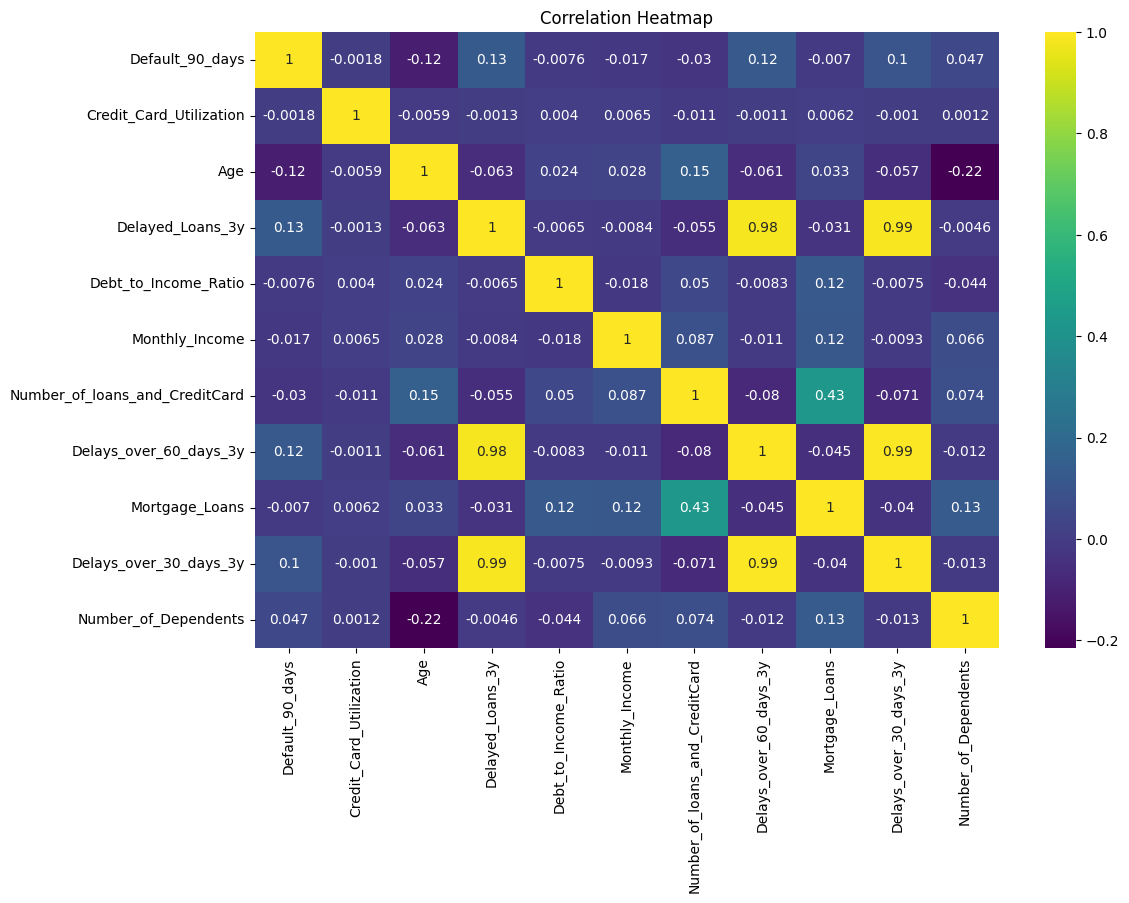

In [ ]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

4. Data Preprocessing:

4.1. Remove outliers


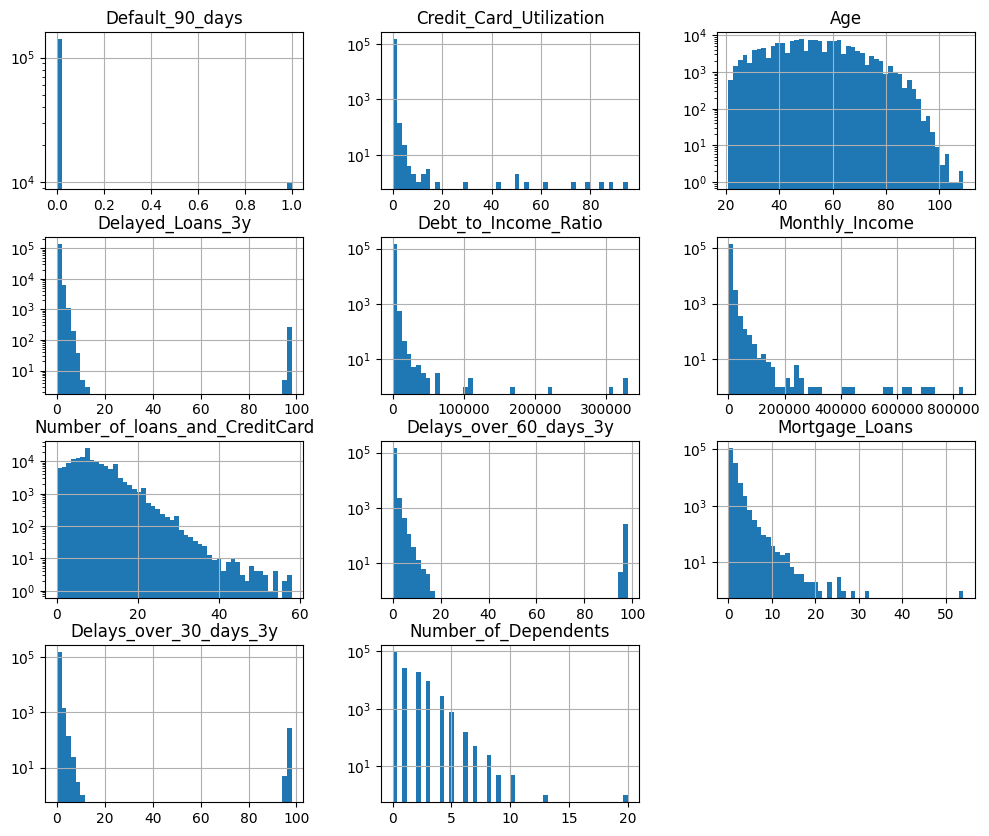

In [ ]:
# Remove outliers with multiple conditions
df_cleaned = df[(df['Credit_Card_Utilization'] <= 100) & (df['Age'] > 10) & (df['Monthly_Income'] < 1e6)]

# Plotting cleaned histograms with a logarithmic y-axis
df_cleaned.hist(bins=50, figsize=(12, 10), log=True)
plt.show()

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149772 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Default_90_days                 149772 non-null  int64  
 1   Credit_Card_Utilization         149772 non-null  float64
 2   Age                             149772 non-null  int64  
 3   Delayed_Loans_3y                149772 non-null  int64  
 4   Debt_to_Income_Ratio            149772 non-null  float64
 5   Monthly_Income                  149772 non-null  float64
 6   Number_of_loans_and_CreditCard  149772 non-null  int64  
 7   Delays_over_60_days_3y          149772 non-null  int64  
 8   Mortgage_Loans                  149772 non-null  int64  
 9   Delays_over_30_days_3y          149772 non-null  int64  
 10  Number_of_Dependents            149772 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB



4.2. Feature scaling (standardization, normalization, etc.)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Create a StandardScaler object
# Used for Random Forest
S_scaler = StandardScaler()

# Fit and transform the data
scaled_data = S_scaler.fit_transform(df_cleaned)

# Create a MinMaxScaler object with a range of 0 to 1
# Used for Neural Network
N_scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
normalized_data = N_scaler.fit_transform(df_cleaned)


4.5. Combining features with high correlation (pick the one with highest correlation to Default_90_days as the representing one)

In [ ]:
# 'Delayed_Loans_3y', 'Delays_over_60_days_3y', 'Delays_over_30_days_3y' are highly correlated
# 'Delayed_Loans_3y' has highest correlation to 'Default_90_days' so keeped
df_cleaned = df_cleaned.drop(['Delays_over_60_days_3y', 'Delays_over_30_days_3y'], axis=1)


4.7. Create a pipeline to perform preprocessing steps sequentially

In [ ]:
cd_cleaned = credit_default[(credit_default['Credit_Card_Utilization'] <= 100) & (credit_default['Age'] > 10) & (credit_default['Monthly_Income'] < 1e6)]
cd_cleaned = cd_cleaned.drop(['Delays_over_60_days_3y', 'Delays_over_30_days_3y'], axis=1)

cd_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120103 entries, 0 to 149999
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Default_90_days                 120103 non-null  int64  
 1   Credit_Card_Utilization         120103 non-null  float64
 2   Age                             120103 non-null  int64  
 3   Delayed_Loans_3y                120103 non-null  int64  
 4   Debt_to_Income_Ratio            120103 non-null  float64
 5   Monthly_Income                  120103 non-null  float64
 6   Number_of_loans_and_CreditCard  120103 non-null  int64  
 7   Mortgage_Loans                  120103 non-null  int64  
 8   Number_of_Dependents            120103 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 9.2 MB


In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

# class OutlierRemover(BaseEstimator, TransformerMixin):
#     def __init__(self, max_utilization=100, min_age=10, max_income=1e6):
#         self.max_utilization = max_utilization
#         self.min_age = min_age
#         self.max_income = max_income


#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         # Convert numpy array back to DataFrame with column names
#         column_names = ['Credit_Card_Utilization', 'Age', 'Delayed_Loans_3y', 'Debt_to_Income_Ratio', 'Monthly_Income', 'Number_of_loans_and_CreditCard',
#                         'Delays_over_60_days_3y', 'Mortgage_Loans', 'Delays_over_30_days_3y', 'Number_of_Dependents']
#         X_df = pd.DataFrame(X, columns=column_names)

#         X_filtered = X_df[(X_df['Credit_Card_Utilization'] < self.max_utilization) &
#                           (X_df['Age'] > self.min_age) &
#                           (X_df['Monthly_Income'] < self.max_income)]
#         return X_filtered

# class FeatureSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, columns_to_drop):
#         self.columns_to_drop = columns_to_drop

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         return X.drop(columns=self.columns_to_drop, axis=1)

# Define imputers for different columns using ColumnTransformer
imputer = ColumnTransformer(
    transformers=[
        ('income_imputer', SimpleImputer(strategy='median'), ['Monthly_Income']),
        ('dependents_imputer', SimpleImputer(strategy='median'), ['Number_of_Dependents'])
    ],
    remainder='passthrough'
)

# Preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', StandardScaler()),
])

# Preprocessing pipeline for neural network
preprocessing_pipeline_NN = Pipeline([
    ('imputer', imputer),
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
])


5. Experimenting with Various Models:

5.1. Establish a baseline model and experiment to find models that improve CV performance over the baseline
Include at least one ensemble model for a total of five models to be tested
Do not use scikit-learn's default parameters for the baseline model; instead, adjust the model parameters based on understanding



In [ ]:
from sklearn.model_selection import train_test_split

#splitting dataset, 80% train, 20% test, keep the proportion of Default_90_days

X = cd_cleaned.drop('Default_90_days', axis=1)
y = cd_cleaned['Default_90_days']

# Splitting the dataset with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # This ensures the proportion of classes is maintained
)


In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# preprocessing
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)
X_test_preprocessed = preprocessing_pipeline.transform(X_test)

# Initialize models
rf_model = RandomForestClassifier()

# Train models
rf_model.fit(X_train_preprocessed, y_train)

# Make predictions and evaluate
rf_predictions = rf_model.predict(X_test_preprocessed)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))

Random Forest Accuracy: 0.9298114150118646


In [ ]:
#SVM
from sklearn.svm import SVC

X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)
X_test_preprocessed = preprocessing_pipeline.transform(X_test)

# Initialize models
svm_model = SVC()

# Train models
svm_model.fit(X_train_preprocessed, y_train)

# Make predictions and evaluate
svm_predictions = svm_model.predict(X_test_preprocessed)

print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))


SVM Accuracy: 0.9304358686149619


In [ ]:
# Multi-layer perceptron
from sklearn.neural_network import MLPClassifier

# preprocessing
X_train_preprocessed_nn = preprocessing_pipeline_NN.fit_transform(X_train)
X_test_preprocessed_nn = preprocessing_pipeline_NN.transform(X_test)

# Define the neural network model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, alpha=0.0001,
                         solver='adam', verbose=10, random_state=1,
                         learning_rate_init=0.01)

# Train the model
nn_model.fit(X_train_preprocessed_nn, y_train)

# Make predictions and evaluate
nn_predictions = nn_model.predict(X_test_preprocessed_nn)
print("Neural Network Accuracy:", accuracy_score(y_test, nn_predictions))

Iteration 1, loss = 0.23639827
Iteration 2, loss = 0.20787545
Iteration 3, loss = 0.20646725
Iteration 4, loss = 0.20587069
Iteration 5, loss = 0.20611189
Iteration 6, loss = 0.20560848
Iteration 7, loss = 0.20501983
Iteration 8, loss = 0.20543512
Iteration 9, loss = 0.20470119
Iteration 10, loss = 0.20508962
Iteration 11, loss = 0.20526867
Iteration 12, loss = 0.20500372
Iteration 13, loss = 0.20493252
Iteration 14, loss = 0.20479497
Iteration 15, loss = 0.20484096
Iteration 16, loss = 0.20492194
Iteration 17, loss = 0.20422130
Iteration 18, loss = 0.20430017
Iteration 19, loss = 0.20457765
Iteration 20, loss = 0.20447641
Iteration 21, loss = 0.20438837
Iteration 22, loss = 0.20408640
Iteration 23, loss = 0.20436192
Iteration 24, loss = 0.20476530
Iteration 25, loss = 0.20403510
Iteration 26, loss = 0.20464628
Iteration 27, loss = 0.20413027
Iteration 28, loss = 0.20422567
Iteration 29, loss = 0.20420857
Iteration 30, loss = 0.20417419
Iteration 31, loss = 0.20401112
Iteration 32, los

In [ ]:
# Xgboost tree
import xgboost as xgb
from sklearn.metrics import accuracy_score
# Assuming preprocessing_pipeline is defined and data is prepared
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)
X_test_preprocessed = preprocessing_pipeline.transform(X_test)

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(seed=42)

# Train the model
xgb_model.fit(X_train_preprocessed, y_train)

# Predict
xgb_predictions = xgb_model.predict(X_test_preprocessed)

# Evaluate the model
print("XGBoost Model Accuracy:", accuracy_score(y_test, xgb_predictions))

XGBoost Model Accuracy: 0.9303109778943425


In [ ]:
# Ada boost tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming preprocessing_pipeline is defined and data is prepared
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)
X_test_preprocessed = preprocessing_pipeline.transform(X_test)

# Initialize the AdaBoost classifier with a Decision Tree as the base estimator
adaboost_model = AdaBoostClassifier(
    random_state=42
)

# Train the model
adaboost_model.fit(X_train_preprocessed, y_train)

# Predict
adaboost_predictions = adaboost_model.predict(X_test_preprocessed)

# Evaluate the model
print("AdaBoost Model Accuracy:", accuracy_score(y_test, adaboost_predictions))

AdaBoost Model Accuracy: 0.9307689105366138



5.2. Measure and compare performance using k-fold CV (5 or 10 folds)

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
# Configure cross-validation mechanism
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:
# random_forest
cv_scores_rf = cross_val_score(rf_model, X_train_preprocessed, y_train, cv=cv, scoring='accuracy')

print("CV scores for each fold:", cv_scores_rf)
print("Average CV score:", cv_scores_rf.mean())

CV scores for each fold: [0.93229953 0.931571   0.93005828 0.9302144  0.93094296]
Average CV score: 0.9310172369844786


In [ ]:
# SVM
cv_scores_SVM = cross_val_score(svm_model, X_train_preprocessed, y_train, cv=cv, scoring='accuracy')

print("CV scores for each fold:", cv_scores_SVM)
print("Average CV score:", cv_scores_SVM.mean())

CV scores for each fold: [0.93063433 0.93084248 0.93109908 0.93083888 0.93083888]
Average CV score: 0.9308507340048147


In [ ]:
# Multi-layer perceptron
cv_scores_nn = cross_val_score(nn_model, X_train_preprocessed_nn, y_train, cv=cv, scoring='accuracy')

print("CV scores for each fold:", cv_scores_nn)
print("Average CV score:", cv_scores_nn.mean())

Iteration 1, loss = 0.24118066
Iteration 2, loss = 0.21067583
Iteration 3, loss = 0.20650301
Iteration 4, loss = 0.20637580
Iteration 5, loss = 0.20617401
Iteration 6, loss = 0.20647896
Iteration 7, loss = 0.20729637
Iteration 8, loss = 0.20567928
Iteration 9, loss = 0.20576085
Iteration 10, loss = 0.20547360
Iteration 11, loss = 0.20541284
Iteration 12, loss = 0.20512537
Iteration 13, loss = 0.20601280
Iteration 14, loss = 0.20538207
Iteration 15, loss = 0.20532462
Iteration 16, loss = 0.20585340
Iteration 17, loss = 0.20482586
Iteration 18, loss = 0.20495843
Iteration 19, loss = 0.20501026
Iteration 20, loss = 0.20465914
Iteration 21, loss = 0.20440806
Iteration 22, loss = 0.20427009
Iteration 23, loss = 0.20471156
Iteration 24, loss = 0.20420078
Iteration 25, loss = 0.20403568
Iteration 26, loss = 0.20432444
Iteration 27, loss = 0.20385726
Iteration 28, loss = 0.20420071
Iteration 29, loss = 0.20397341
Iteration 30, loss = 0.20429767
Iteration 31, loss = 0.20388846
Iteration 32, los

In [ ]:
import xgboost as xgb

# Convert data to DMatrix object, optimized for XGBoost
dtrain = xgb.DMatrix(X_train_preprocessed, label=y_train)

# Define XGBoost model parameters
params = {
    'seed': 42
}

# Perform cross-validation using "error" as the metric
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=100,     # Number of boosting rounds
    nfold=5,                 # Number of folds in CV
    metrics={'error'},       # Using "error", which is 1 - accuracy
    seed=42,                 # Random seed for reproducibility
)

# Since "error" is 1 - accuracy, we calculate accuracy from error
cv_results['accuracy'] = 1 - cv_results['test-error-mean']

print("CV results:\n", cv_results[['test-error-mean', 'accuracy']])
print("Average CV Accuracy:", cv_results['accuracy'].iloc[-1])

CV results:
     test-error-mean  accuracy
0          0.069503  0.930497
1          0.069503  0.930497
2          0.069409  0.930591
3          0.068775  0.931225
4          0.068431  0.931569
..              ...       ...
95         0.070148  0.929852
96         0.070138  0.929862
97         0.070128  0.929872
98         0.070096  0.929904
99         0.070159  0.929841

[100 rows x 2 columns]
Average CV Accuracy: 0.9298411694830118


In [ ]:
# adaboost_model
cv_scores_adaboost = cross_val_score(adaboost_model, X_train_preprocessed, y_train, cv=cv, scoring='accuracy')

print("CV scores for each fold:", cv_scores_adaboost)
print("Average CV score:", cv_scores_adaboost.mean())

CV scores for each fold: [0.93229953 0.931571   0.93234804 0.93135928 0.93234804]
Average CV score: 0.9319851803649948


Random Forest:
- Accuracy: 0.9298114150118646
- CV score: 0.9310172369844786

SVM:
- Accuracy: 0.9304358686149619
- CV score: 0.9308507340048147

Multi-layer perceptron:
- Accuracy: 0.9307272802964073 [highest]
- CV score: 0.9311421453614244

Xgboost tree:
- Accuracy: 0.9303109778943425
- CV score: 0.9298411694830118

Adaboost tree:
- Accuracy: 0.9307689105366138 [2nd highest]
- CV score: 0.9319851803649948 [highest]

Although MLP has the highest accuracy, but it takes longest time to train while the Adaboost tree is 2nd highest and fast to train, we pick **Adaboost tree** and do further model tuning.

6. Model Tuning and Final Model Selection:

6.1. Use **grid search** to adjust hyperparameters (evaluate using CV performance)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Setup the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)  # Start with max_depth=1, typical for AdaBoost

# Initialize AdaBoost with the base estimator
ada = AdaBoostClassifier(estimator=base_estimator)

# Define parameter grid
param_grid = {
    'estimator__max_depth': [1, 2, 3, 4],
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

# Setup GridSearchCV
grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_preprocessed, y_train)

# Best model
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'estimator__max_depth': 1, 'learning_rate': 0.5, 'n_estimators': 150}
Best score: 0.9322453661167774


Final model:

Adaboost Tree with 'estimator__max_depth': 1, 'learning_rate': 0.5, 'n_estimators': 150